In [1]:
import detObjFunc as RV
%matplotlib notebook
orImage=RV.loadImage("petriDish_test_2.png")

In [2]:
def getPetriDish(iImage,draw=0):
    #set draw=1 to see intermediate debug steps
    import cv2
    import matplotlib.pyplot as plt
    import detObjFunc as RV
    from PIL import Image
    import numpy as np
    #var init
    minR=50
    maxR=300
    #grayscale and gauss
    grImage=cv2.cvtColor(iImage,cv2.COLOR_RGB2GRAY)
    grImage=cv2.GaussianBlur(grImage, (21,21),0 );
    if draw:
        RV.showImage(iImage,"Original Image")
        #RV.showImage(grImage,"Gray Image")

    #hough circles
    foundVar=cv2.HoughCircles(grImage,cv2.HOUGH_GRADIENT,1,50,param1=50,param2=50,minRadius=minR,maxRadius=maxR)

    if foundVar is not None:
        foundVar=np.round(foundVar[0,:]).astype("int")
    drImage=iImage
    rMax=np.max(foundVar,axis=0)[2]
    i=0;
    iMax=-1
    for (x,y,r) in foundVar:
        if r==rMax:
            iMax=i;
            drImage=cv2.circle(drImage,(x,y),r,(127,0,255),8)
        else:
            drImage=cv2.circle(drImage,(x,y),r,(0,127,255),3)
        i=i+1
    if draw:
        RV.showImage(drImage,"Found circles")
        print(iMax)
        print(np.shape(foundVar))
        print("xCoord= "+str(foundVar[iMax,0])+" \nyCoord= "+str(foundVar[iMax,1])+" \nradius= "+str(foundVar[iMax,2]))
    return (foundVar[iMax,0],foundVar[iMax,1],foundVar[iMax,2])

<IPython.core.display.Javascript object>


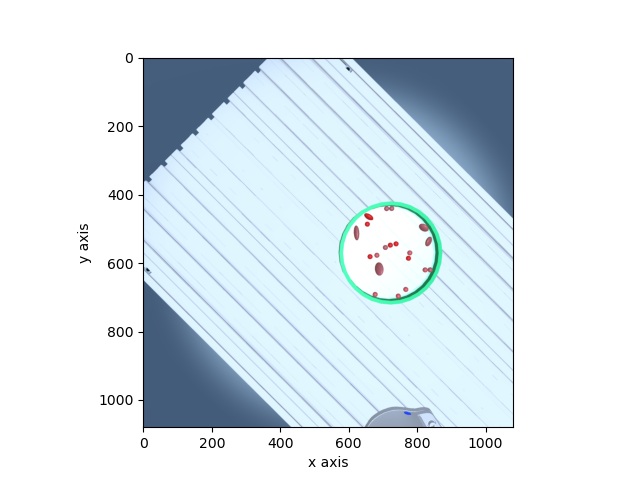

<IPython.core.display.Javascript object>


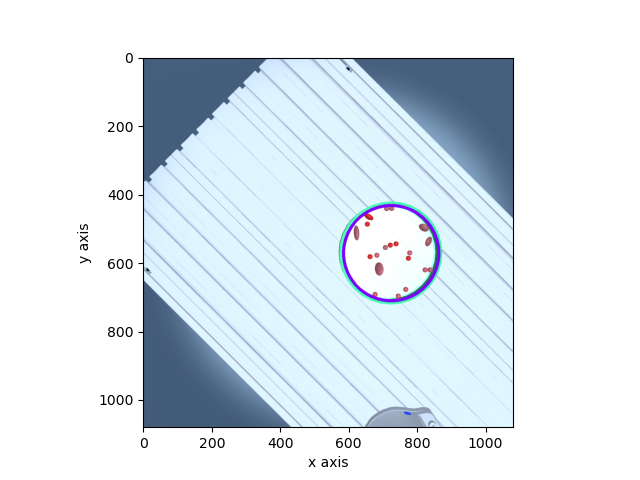

0
(1, 3)
xCoord= 724 
yCoord= 572 
radius= 139


(724, 572, 139)

In [3]:
getPetriDish(orImage,1)